In [1]:
import requests
import urllib.parse

def get_series_data(search_text, api_key):
    # URL encode the search text to ensure special characters are handled properly
    encoded_search_text = urllib.parse.quote(search_text)
    
    # Make the search request to FRED API with the encoded search text
    search_url = f"https://api.stlouisfed.org/fred/series/search?search_text={encoded_search_text}&api_key={api_key}&file_type=json"
    response = requests.get(search_url)
    
    # If the request is successful
    if response.status_code == 200:
        data = response.json()
        series_list = data.get("seriess", [])
        
        # Filter for US-related series by checking if 'US' is in the title
        us_series_list = [series for series in series_list if 'US' in series['title']]

        # Create a list to store series names and ids
        series_info = []
        
        for series in us_series_list:
            series_info.append((series['title'], series['id']))
        
        return series_info
    
    else:
        print(f"Error: {response.status_code}")
        return None


# Your API key (keep it secure)
api_key = '0d10f492049f3de481ba7fa08448bf21'

# List of search terms for the statistics you're interested in
search_terms = [
    "Exports of Goods and Services",
    "Imports of Goods and Services",
    "Net Exports (Exports - Imports)",
    "Current Account Balance",
    "Capital Account Balance",
    "Financial Account Balance",
    "Foreign Direct Investment (FDI)",
    "Portfolio Investment",
    "Reserve Assets",
    "Trade Balance"
]

# To store the results for each term
all_series_info = {}

# Loop through each search term and fetch the data
for term in search_terms:
    print(f"Fetching data for: {term}")
    series_info = get_series_data(term, api_key)
    
    # If series info is returned, store it
    if series_info:
        all_series_info[term] = series_info

# Now `all_series_info` contains the series names and IDs for the different terms
# You can access and display the series names and IDs like this:
for term, series_list in all_series_info.items():
    print(f"\nSeries for: {term}")
    for series_name, series_id in series_list:
        print(f"Series Name: {series_name}, Series ID: {series_id}")


Fetching data for: Exports of Goods and Services
Fetching data for: Imports of Goods and Services
Fetching data for: Net Exports (Exports - Imports)
Fetching data for: Current Account Balance
Fetching data for: Capital Account Balance
Fetching data for: Financial Account Balance
Fetching data for: Foreign Direct Investment (FDI)
Fetching data for: Portfolio Investment
Fetching data for: Reserve Assets
Fetching data for: Trade Balance

Series for: Portfolio Investment
Series Name: US Acquisition of Portfolio Investment Assets, Series ID: IEAAPI
Series Name: US Acquisition of Portfolio Investment Assets, Series ID: IEAAPIA
Series Name: US Acquisition of Portfolio Investment Assets, Series ID: IEAAPIN
Series Name: AD&Co US Mortgage High Yield Index, Credit-and-Option-Adjusted Spread: Mid-Tier, Series ID: CROASMIDTIER
Series Name: US Incurrence of Portfolio Investment Liabilities: Equity and investment fund shares, Series ID: IEAIPIE
Series Name: US Incurrence of Portfolio Investment Liabi

In [3]:
import pandas as pd
import requests

# FRED API parameters
api_key = "0d10f492049f3de481ba7fa08448bf21"
file_type = "json"
observation_start = "2000-01-01"
observation_end = "2024-12-31"
limit = 1000
frequency = "m"  # monthly data
sort_order = "asc"

# Series IDs for Portfolio Investment Assets and Reserve Assets
portfolio_investment_assets_series_ids = [
    "IEAAPI", "IEAAPIA", "IEAAPIN", "CROASMIDTIER", "IEAIPIE", "IEAIPIEN", "IEAAPIE", "IEAIPIEA", 
    "IEAAPIEA", "IEAAPIEN", "IEAIPI", "IEAIPIN", "IEAIPIA", "IEAIPID", "IEAIPIDN", "IEAAPID", 
    "IEAAPIDA", "IEAIPIDA", "IEAAPIDN", "CROASTIER0", "CROASTIER1", "CRTINDEXTIER1", "CROASTIER3", 
    "CROASTIER2", "CRTINDEXTIER0", "CRTINDEXTIER3", "CRTINDEXTIER2", "CRTINDEXMIDTIER"
]

reserve_assets_series_ids = [
    "IEAARM", "IEAARMN", "IEAARMA", "IEAARON", "IEAARO", "IEAARIMF", "IEAARIMFN", "IEAARIMFA", 
    "IEAAR", "IEAARN", "IEAARA", "IEAAORO", "IEAAORON", "IEAARSD", "IEAAS", "IEAAFDN", "IEAAFD", 
    "IEAAFDA", "IEAACDN", "IEAACD", "IEAAROA", "IEAAOROA", "IEAARSDA", "IEAARSDN", "IEAASA", 
    "IEAASN", "IEAACDA"
]

# Dictionary mapping series IDs to their names
series_id_to_name = {
    "IEAAPI": "Portfolio Investment Assets",
    "IEAAPIA": "Portfolio Investment Assets - A",
    "IEAAPIN": "Portfolio Investment Assets - N",
    "CROASMIDTIER": "Portfolio Investment Assets - Tier 1",
    "IEAIPIE": "Portfolio Investment Assets - PIE",
    "IEAIPIEN": "Portfolio Investment Assets - PIE N",
    "IEAAPIE": "Portfolio Investment Assets - PIE All",
    "IEAIPIEA": "Portfolio Investment Assets - PIE A",
    "IEAAPIEA": "Portfolio Investment Assets - PIE A All",
    "IEAAPIEN": "Portfolio Investment Assets - PIE EN",
    "IEAIPI": "Portfolio Investment Assets - PI",
    "IEAIPIN": "Portfolio Investment Assets - PIN",
    "IEAIPIA": "Portfolio Investment Assets - PIA",
    "IEAIPID": "Portfolio Investment Assets - PID",
    "IEAIPIDN": "Portfolio Investment Assets - PIDN",
    "IEAAPID": "Portfolio Investment Assets - AID",
    "IEAAPIDA": "Portfolio Investment Assets - AIDA",
    "IEAIPIDA": "Portfolio Investment Assets - PIDA",
    "IEAAPIDN": "Portfolio Investment Assets - AIDN",
    "CROASTIER0": "Reserve Assets - Tier 0",
    "CROASTIER1": "Reserve Assets - Tier 1",
    "CRTINDEXTIER1": "Reserve Assets - CRT Tier 1",
    "CROASTIER3": "Reserve Assets - Tier 3",
    "CROASTIER2": "Reserve Assets - Tier 2",
    "CRTINDEXTIER0": "Reserve Assets - CRT Tier 0",
    "CRTINDEXTIER3": "Reserve Assets - CRT Tier 3",
    "CRTINDEXTIER2": "Reserve Assets - CRT Tier 2",
    "CRTINDEXMIDTIER": "Reserve Assets - CRT Mid Tier",
    "IEAARM": "Reserve Assets - ARM",
    "IEAARMN": "Reserve Assets - ARM N",
    "IEAARMA": "Reserve Assets - ARMA",
    "IEAARON": "Reserve Assets - ARON",
    "IEAARO": "Reserve Assets - ARO",
    "IEAARIMF": "Reserve Assets - ARIMF",
    "IEAARIMFN": "Reserve Assets - ARIMFN",
    "IEAARIMFA": "Reserve Assets - ARIMFA",
    "IEAAR": "Reserve Assets - AR",
    "IEAARN": "Reserve Assets - ARN",
    "IEAARA": "Reserve Assets - ARA",
    "IEAAORO": "Reserve Assets - AORO",
    "IEAAORON": "Reserve Assets - AORON",
    "IEAARSD": "Reserve Assets - ARSD",
    "IEAAS": "Reserve Assets - AS",
    "IEAAFDN": "Reserve Assets - AFDN",
    "IEAAFD": "Reserve Assets - AFD",
    "IEAAFDA": "Reserve Assets - AFDA",
    "IEAACDN": "Reserve Assets - AACDN",
    "IEAACD": "Reserve Assets - AACD",
    "IEAAROA": "Reserve Assets - AROA",
    "IEAAOROA": "Reserve Assets - AOROA",
    "IEAARSDA": "Reserve Assets - ARSDA",
    "IEAARSDN": "Reserve Assets - ARSDN",
    "IEAASA": "Reserve Assets - ASA",
    "IEAASN": "Reserve Assets - ASN",
    "IEAACDA": "Reserve Assets - AACDA"
}

# Function to fetch data for a given series_id
def fetch_data_for_series(series_id):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type={file_type}&observation_start={observation_start}&observation_end={observation_end}&limit={limit}&frequency={frequency}&sort_order={sort_order}"
    
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        observations = data.get("observations", [])
        
        # Collecting data for the DataFrame
        data_list = []
        for obs in observations:
            series_name = series_id_to_name.get(series_id, "Unknown Series")  # Get the series name
            data_list.append({
                "Series_Name": series_name,
                "Series_ID": series_id,
                "Date": obs["date"],
                "Value": obs["value"]
            })
        
        # Convert to DataFrame
        df = pd.DataFrame(data_list)
        return df
    else:
        print(f"Failed to retrieve data for series ID {series_id}: {response.status_code}")
        return pd.DataFrame()

# Collecting DataFrames for all series
dfs = []
for series_id in portfolio_investment_assets_series_ids + reserve_assets_series_ids:
    df = fetch_data_for_series(series_id)
    if not df.empty:
        dfs.append(df)

# Concatenate all DataFrames into a single one
final_df = pd.concat(dfs, ignore_index=True)

# Displaying the final DataFrame
print(final_df)

Failed to retrieve data for series ID IEAAPI: 400
Failed to retrieve data for series ID IEAAPIA: 400
Failed to retrieve data for series ID IEAAPIN: 400
Failed to retrieve data for series ID IEAIPIE: 400
Failed to retrieve data for series ID IEAIPIEN: 400
Failed to retrieve data for series ID IEAAPIE: 400
Failed to retrieve data for series ID IEAIPIEA: 400
Failed to retrieve data for series ID IEAAPIEA: 400
Failed to retrieve data for series ID IEAAPIEN: 400
Failed to retrieve data for series ID IEAIPI: 400
Failed to retrieve data for series ID IEAIPIN: 400
Failed to retrieve data for series ID IEAIPIA: 400
Failed to retrieve data for series ID IEAIPID: 400
Failed to retrieve data for series ID IEAIPIDN: 400
Failed to retrieve data for series ID IEAAPID: 400
Failed to retrieve data for series ID IEAAPIDA: 400
Failed to retrieve data for series ID IEAIPIDA: 400
Failed to retrieve data for series ID IEAAPIDN: 400
Failed to retrieve data for series ID IEAARM: 400
Failed to retrieve data fo

In [12]:
# storing final df to postgres
# Step 1: Install Required Libraries
!pip install sqlalchemy psycopg2

# Step 2: Import Libraries
import pandas as pd
from sqlalchemy import create_engine




# Step 4: Database Connection Details (replace with your actual credentials)
db_config = {
    'dbname': 'pg4e_96c46dbe33',  # e.g., 'mydatabase'
    'user': 'pg4e_96c46dbe33',         # e.g., 'myuser'
    'password': 'pg4e_p_4984e3e88e36654',     # e.g., 'mypassword'
    'host': 'pg.pg4e.com',             # e.g., 'pg.example.com'
    'port': '5432'              # Default is 5432 for PostgreSQL
}

# Create a connection string
connection_string = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"

# Step 5: Create a SQLAlchemy Engine
engine = create_engine(connection_string)

# Step 6: Insert DataFrame into PostgreSQL
table_name = 'FRED_DATA'  # Replace with your desired table name
final_df.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"DataFrame successfully inserted into table '{table_name}'.")

# Step 7: Verify the Data (Optional)
# Query the database to verify the data
query = f"SELECT * FROM {table_name};"
df_from_db = pd.read_sql(query, engine)
print("Data from the database:")
print(df_from_db)

DataFrame successfully inserted into table 'FRED_DATA'.


ProgrammingError: (psycopg2.errors.UndefinedTable) relation "fred_data" does not exist
LINE 1: SELECT * FROM FRED_DATA;
                      ^

[SQL: SELECT * FROM FRED_DATA;]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [4]:
!pip install prophet

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from prophet import Prophet



final_df['Date'] = pd.to_datetime(final_df['Date'])


final_df.set_index('Date', inplace=True)


portfolio_df = final_df[final_df['Series_ID'] == 'CROASMIDTIER']  


portfolio_df = portfolio_df.resample('M').mean()

portfolio_df.fillna(method='ffill', inplace=True)

portfolio_df.head()


,Value
Date,
2015-06-30,361.589251
2015-07-31,386.876042
2015-08-31,404.517020
2015-09-30,414.190847
2015-10-31,433.302898


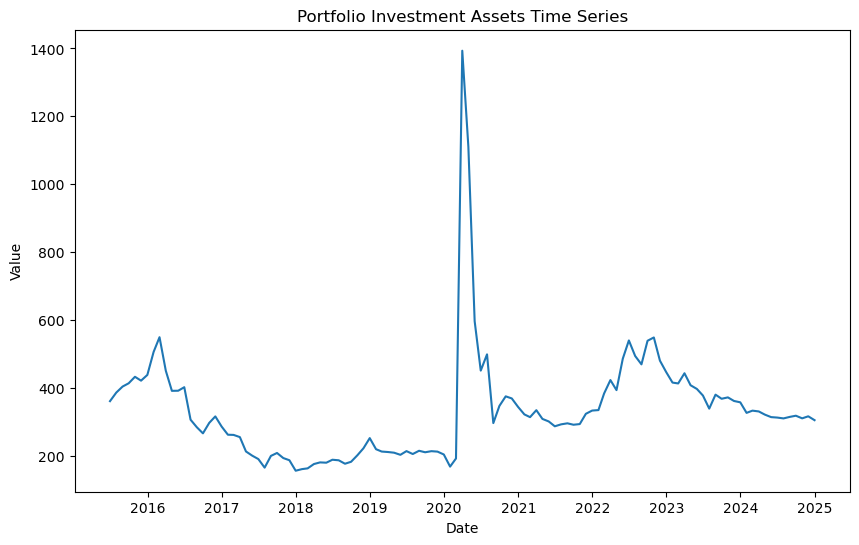

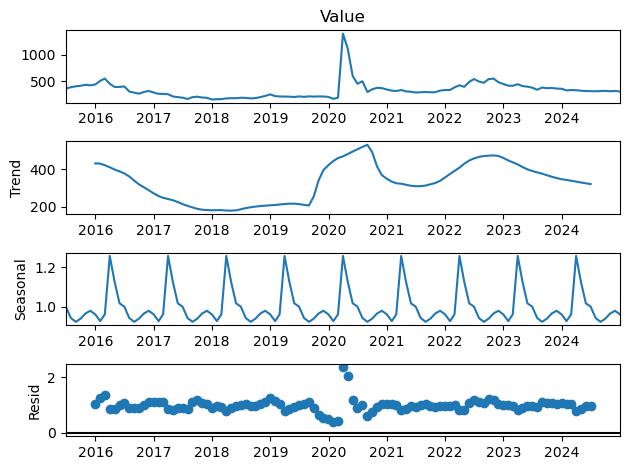

In [5]:

plt.figure(figsize=(10, 6))
plt.plot(portfolio_df['Value'])
plt.title('Portfolio Investment Assets Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(portfolio_df['Value'], model='multiplicative')


decomposition.plot()
plt.show()

02:28:15 - cmdstanpy - INFO - Chain [1] start processing


ARIMA Model - MAPE: 0.3132864688025159
ARIMA Model - RMSE: 111.60893277763435


02:28:16 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model - MAPE: 0.3839051715234335
Prophet Model - RMSE: 155.71602390615806


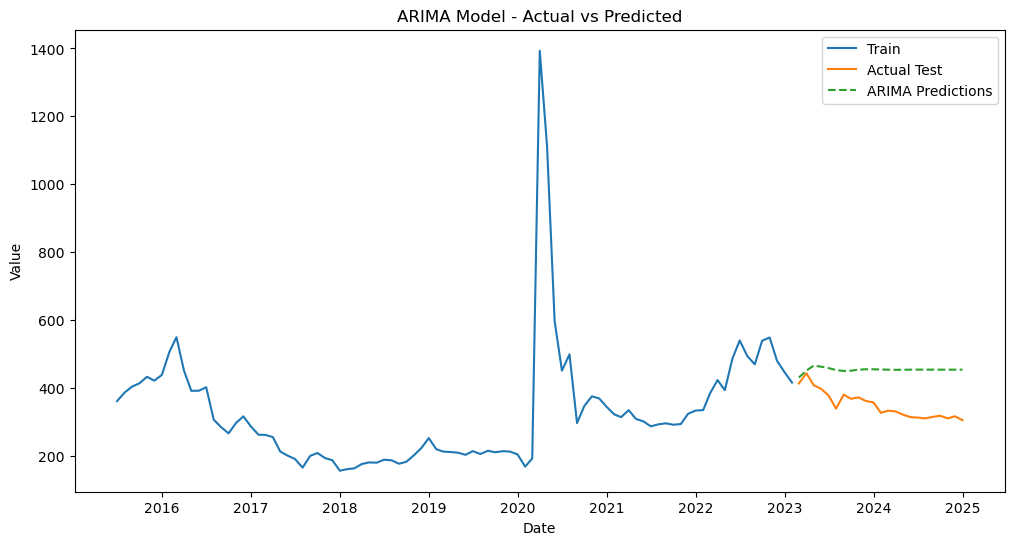

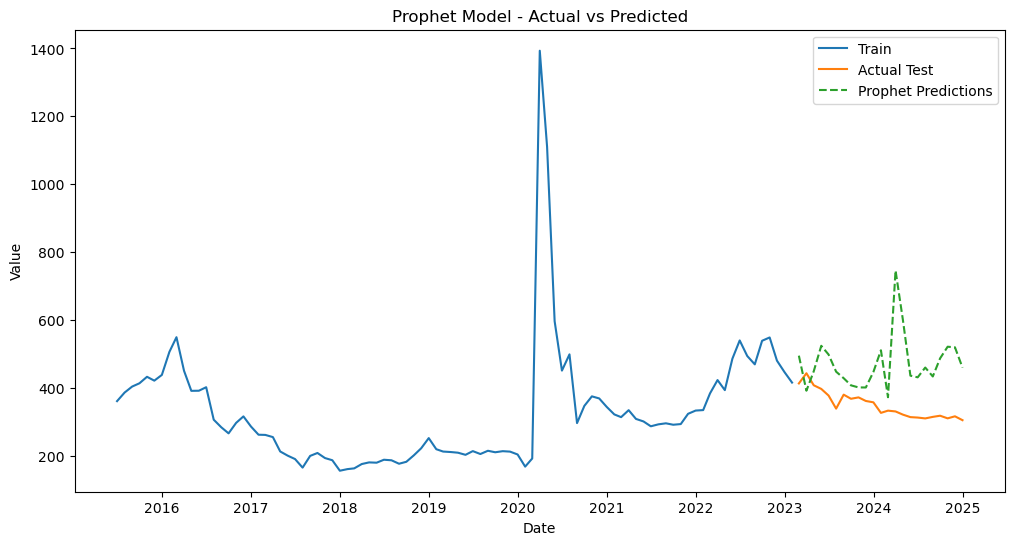

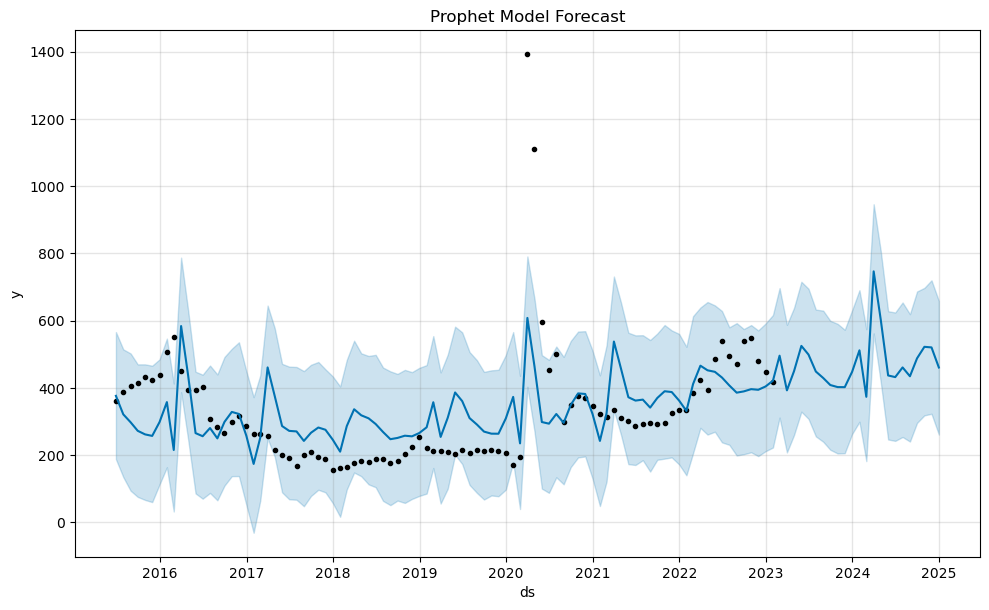

In [6]:
train_size = int(len(portfolio_df) * 0.8)
train_arima, test_arima = portfolio_df[:train_size], portfolio_df[train_size:]

# Fit an ARIMA model (adjust p, d, q as needed)
arima_model = ARIMA(train_arima['Value'], order=(5, 1, 0))  # Example parameters
arima_model_fit = arima_model.fit()

# Make predictions on the test set
arima_predictions = arima_model_fit.forecast(steps=len(test_arima))

# Evaluate the model using MAPE and RMSE
mape_arima = mean_absolute_percentage_error(test_arima['Value'], arima_predictions)
rmse_arima = mean_squared_error(test_arima['Value'], arima_predictions, squared=False)

print(f'ARIMA Model - MAPE: {mape_arima}')
print(f'ARIMA Model - RMSE: {rmse_arima}')

# Prophet Section
# Prepare the data for Prophet 
prophet_df = portfolio_df.reset_index()[['Date', 'Value']]
prophet_df.columns = ['ds', 'y']

# Split into training and test sets 
train_size = int(len(prophet_df) * 0.8)
train_prophet = prophet_df[:train_size]
test_prophet = prophet_df[train_size:]

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Create a future dataframe for forecasting 
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='M')

# Generate the forecast
forecast = prophet_model.predict(future)

# Evaluate the Prophet model by comparing actual vs forecasted values
prophet_predictions = forecast['yhat'][-len(test_prophet):].values

# Evaluate using MAPE and RMSE
mape_prophet = mean_absolute_percentage_error(test_prophet['y'], prophet_predictions)
rmse_prophet = mean_squared_error(test_prophet['y'], prophet_predictions, squared=False)

# Print the results
print(f'Prophet Model - MAPE: {mape_prophet}')
print(f'Prophet Model - RMSE: {rmse_prophet}')

# Plotting Section
# Plot Actual vs Predicted (ARIMA)
plt.figure(figsize=(12, 6))
plt.plot(train_arima.index, train_arima['Value'], label='Train')
plt.plot(test_arima.index, test_arima['Value'], label='Actual Test')
plt.plot(test_arima.index, arima_predictions, label='ARIMA Predictions', linestyle='--')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot Actual vs Predicted (Prophet)
plt.figure(figsize=(12, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Actual Test')
plt.plot(test_prophet['ds'], prophet_predictions, label='Prophet Predictions', linestyle='--')
plt.title('Prophet Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the forecasted values from Prophet
prophet_model.plot(forecast)
plt.title('Prophet Model Forecast')
plt.show()

In [10]:
# Step 1: Install Required Libraries
!pip install sqlalchemy psycopg2

# Step 2: Import Libraries
import pandas as pd
from sqlalchemy import create_engine




# Step 4: Database Connection Details (replace with your actual credentials)
db_config = {
    'dbname': 'pg4e_96c46dbe33',  # e.g., 'mydatabase'
    'user': 'pg4e_96c46dbe33',         # e.g., 'myuser'
    'password': 'pg4e_p_4984e3e88e36654',     # e.g., 'mypassword'
    'host': 'pg.pg4e.com',             # e.g., 'pg.example.com'
    'port': '5432'              # Default is 5432 for PostgreSQL
}

# Create a connection string
connection_string = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"

# Step 5: Create a SQLAlchemy Engine
engine = create_engine(connection_string)

# Step 6: Insert DataFrame into PostgreSQL
table_name = 'FRED_DATA'  # Replace with your desired table name
finaldf.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"DataFrame successfully inserted into table '{table_name}'.")

# Step 7: Verify the Data (Optional)
# Query the database to verify the data
query = f"SELECT * FROM {table_name};"
df_from_db = pd.read_sql(query, engine)
print("Data from the database:")
print(df_from_db)

DataFrame successfully inserted into table 'FRED DATA'.


ProgrammingError: (psycopg2.errors.UndefinedTable) relation "fred" does not exist
LINE 1: SELECT * FROM FRED DATA;
                      ^

[SQL: SELECT * FROM FRED DATA;]
(Background on this error at: https://sqlalche.me/e/14/f405)